In [1]:
import os
os.chdir('/gstore/project/hr_brca_heterogeneity/T47D_trace_Seq_v2/Nathan/mse')
os.listdir()

['mse_dict_trans_combo_plsrres0.5_HALL.csv',
 'mse_dict_trans_9545_plsrres0.3_HALL3.csv',
 'mse_dict_trans_9545_GENE080.csv',
 'mse_dict_trans_9545_BREAST090.csv',
 'mse_dict_trans_palbo_plsrres0.3_BREAST5.csv',
 'mse_dict_trans_9545_plsrres0.3_HALL5.csv',
 'mse_dict_trans_palbo_plsrres0.3_HALL5.csv',
 'mse_dict_trans2_seq15.csv',
 'mse_dict_trans_palbo_plsrres0.3_HALL3.csv',
 'mse_dict_trans_palbo6.csv',
 'mse_dict_trans6_epoch10_seqlen25.csv',
 'mse_dict_trans_9545_GENE075_all.csv',
 'mse_dict_trans_9545_BREAST080.csv',
 'mse_dict_trans_9545_plsrres0.3_HALL3_layers1.csv',
 'mse_dict_trans_9545_plsrres0.3_HALL.csv',
 'mse_dict_trans_9545_plsrres0.3_HALL3_seqlen4.csv',
 'mse_dict_trans_9545_plsrres0.3_BREAST2.csv',
 'mse_dict_trans_palbo_plsrres0.3_HALL2.csv',
 'mse_dict_trans_combo1.csv',
 'mse_dict_trans9_path_seqlen8.csv',
 'mse_dict_trans_9545_GENEiter.csv',
 'mse_dict_trans_palbo_BREAST.csv',
 'mse_dict_trans_9545_plsrres0.3_HALL3_seqlen16.csv',
 'mse_dict_trans_9545_plsrres0.3_HA

In [2]:
import pandas as pd

mse_file = open('mse_dict_trans_9545_plsrres0.3_HALL4.csv', 'r')
for line in mse_file:
    mse = eval(line)
mse

{'GFPBC_libB_92196': {1: [0.0026032729506499596,
   0.07849584729263237,
   0.11926014395466553,
   0.6815220780392292,
   0.029516030776360096,
   0.04465797032495392]},
 'GFPBC_libB_20182': {1: [0.0008518761602053001,
   0.02018430704596832,
   0.03852069604947392,
   0.03355637800802402,
   0.012769190764641176,
   0.008819539971097053]},
 'GFPBC_libB_90850': {1: [0.0009369385508494336,
   0.3537108751722362,
   0.10506813816249692,
   1.0320993047877645,
   0.020345202837062967,
   0.20040204419502575]},
 'GFPBC_libB_10678': {1: [0.000426028949526212,
   0.5590448467417138,
   0.009630425012994034,
   0.5939330757141038,
   0.0039550710307157035,
   0.6350061204153754]},
 'GFPBC_libB_37798': {1: [0.0005962685344291679,
   0.3376174849041663,
   0.010980353855356083,
   0.5349973977750683,
   0.004707979489298978,
   0.42978810837611786]},
 'GFPBC_libB_31581': {1: [0.00783304120630803,
   0.06258644642345089,
   0.13911256096553648,
   0.42316290023091846,
   0.03242717778006876,
  

In [3]:
trans_train = {}
trans_val = {}
regr_train = {}
regr_val = {}
for bar in mse.keys():
    trans_train[bar] = {}
    trans_val[bar] = {}
    regr_train[bar] = {}
    regr_val[bar] = {}
    for day in mse[bar].keys():
        trans_train[bar][day] = mse[bar][day][0]
        trans_val[bar][day] = mse[bar][day][1]
        regr_train[bar][day] = mse[bar][day][2]
        regr_val[bar][day] = mse[bar][day][3]

In [4]:
trans_val_df = pd.DataFrame(trans_val)
regr_val_df = pd.DataFrame(regr_val)
trans_val_df

,GFPBC_libB_92196,GFPBC_libB_20182,GFPBC_libB_90850,GFPBC_libB_10678,GFPBC_libB_37798,GFPBC_libB_31581,GFPBC_libB_40758,GFPBC_libB_94397,GFPBC_libB_83026,GFPBC_libB_10737
1,0.078496,0.020184,0.353711,0.559045,0.337617,0.062586,1.100072,2.312522,1.264617,0.092398


In [5]:
regr_val_df

,GFPBC_libB_92196,GFPBC_libB_20182,GFPBC_libB_90850,GFPBC_libB_10678,GFPBC_libB_37798,GFPBC_libB_31581,GFPBC_libB_40758,GFPBC_libB_94397,GFPBC_libB_83026,GFPBC_libB_10737
1,0.681522,0.033556,1.032099,0.593933,0.534997,0.423163,1.767124,1.719204,1.265542,0.156364


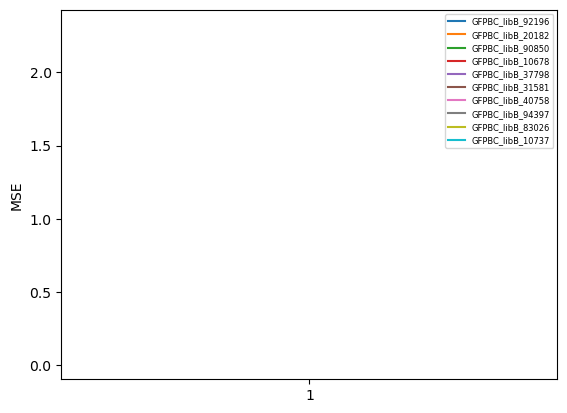

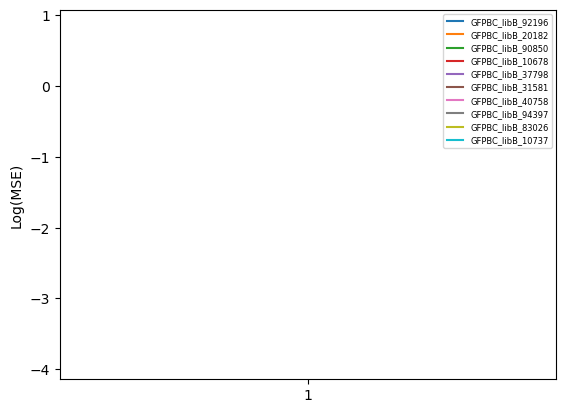

IndexError: single positional indexer is out-of-bounds

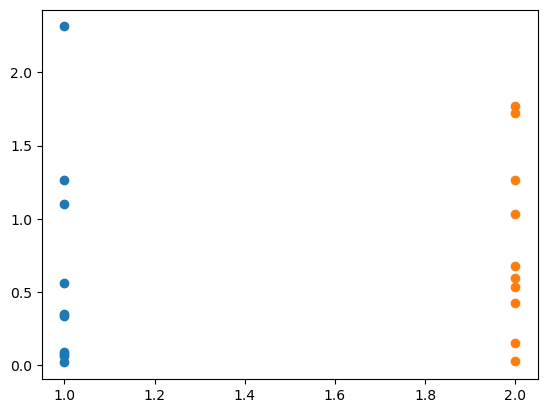

In [6]:
import matplotlib.pyplot as plt
import numpy as np

for col in trans_val_df.columns:
    plt.plot(range(len(mse[col].keys())), trans_val_df[col], label=col)
plt.legend(fontsize=6)
plt.ylabel('MSE')
#plt.xlabel('Days')
plt.xticks(range(len(mse[col].keys())), mse[col].keys())
#plt.xticklabels(['Day 0', 'Day 1', 'Day 4', 'Day 8', 'Day 26'])
plt.show()


for col in trans_val_df.columns:
    plt.plot(range(len(mse[col].keys())), np.log(trans_val_df[col]), label=col)
plt.legend(fontsize=6)
plt.ylabel('Log(MSE)')
#plt.xlabel('Days')
plt.xticks(range(len(mse[col].keys())), mse[col].keys())
#plt.xticklabels(['Day 0', 'Day 1', 'Day 4', 'Day 8', 'Day 26'])
plt.show()

plt.scatter([1 for _ in trans_val_df.iloc[-1]], trans_val_df.iloc[-1])
plt.scatter([2 for _ in trans_val_df.iloc[-1]], regr_val_df.iloc[-1])
plt.scatter([3 for _ in trans_val_df.iloc[-2]], trans_val_df.iloc[-2])
plt.scatter([4 for _ in trans_val_df.iloc[-2]], regr_val_df.iloc[-2])
plt.xticks(range(1, 5), ['Trans - Day 26', 'Regr - Day 26', 'Trans - Day 8', 'Regr - Day 8'])
plt.ylabel('MSE')
plt.show()


plt.scatter([1 for _ in trans_val_df.iloc[-1]], np.log(trans_val_df.iloc[-1]))
for i in range(len(trans_val_df.iloc[-1])):
    plt.annotate(trans_val_df.columns[i], (1, np.log(trans_val_df.iloc[-1][i])), fontsize=6)
plt.scatter([2 for _ in trans_val_df.iloc[-1]], np.log(regr_val_df.iloc[-1]))
for i in range(len(regr_val_df.iloc[-1])):
    plt.annotate(regr_val_df.columns[i], (2, np.log(regr_val_df.iloc[-1][i])), fontsize=6)
plt.scatter([3 for _ in trans_val_df.iloc[-2]], np.log(trans_val_df.iloc[-2]))
for i in range(len(trans_val_df.iloc[-2])):
    plt.annotate(trans_val_df.columns[i], (3, np.log(trans_val_df.iloc[-2][i])), fontsize=6)
plt.scatter([4 for _ in trans_val_df.iloc[-2]], np.log(regr_val_df.iloc[-2]))
for i in range(len(regr_val_df.iloc[-2])):
    plt.annotate(regr_val_df.columns[i], (4, np.log(regr_val_df.iloc[-2][i])), fontsize=6)
plt.xticks(range(1, 5), ['Trans - Day 26', 'Regr - Day 26', 'Trans - Day 8', 'Regr - Day 8'])
plt.ylabel('Log(MSE)')
plt.show()

mse_dict_trans_9545_plsrres0.3_BREAST3.csv


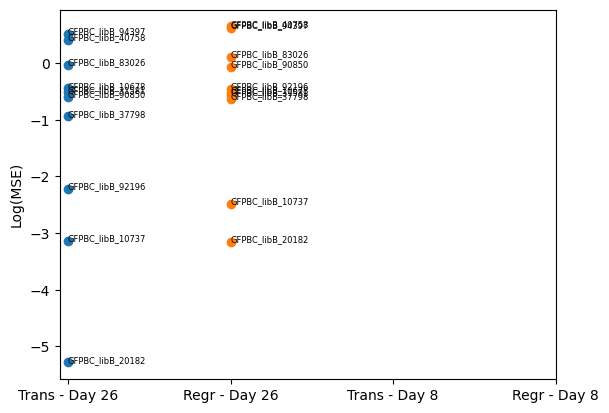

9545_plsrres0.3_BREAST3.csv Regr_9545_plsrres0.3_BREAST3.csv
mse_dict_trans_9545_plsrres0.3_HALL3.csv


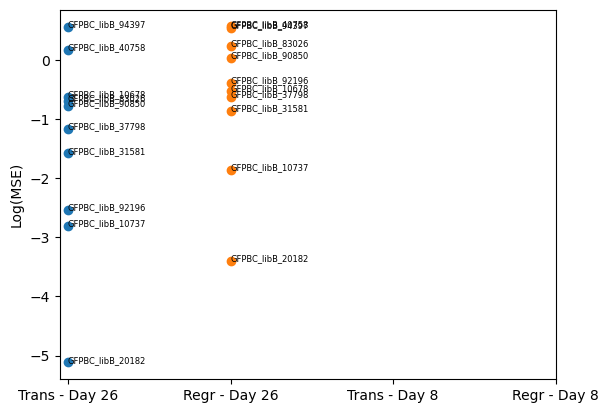

9545_plsrres0.3_HALL3.csv Regr_9545_plsrres0.3_HALL3.csv


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#mse_files = ['mse_dict_trans6_epoch5_seqlen8.csv', 'mse_dict_trans6_epoch5_seqlen10.csv', 'mse_dict_trans6_epoch5_seqlen15.csv']
mse_files = ['mse_dict_trans_9545_plsrres0.3_BREAST3.csv', 'mse_dict_trans_9545_plsrres0.3_HALL3.csv']
#mse_files = ['mse_dict_trans_palbo_plsrres0.3_BREAST3.csv', 'mse_dict_trans_palbo_plsrres0.3_HALL3.csv'] 
             #'mse_dict_trans_combo_plsrres0.5_BREAST.csv', 'mse_dict_trans_combo_plsrres0.5_HALL.csv']
bar_mse = {}
for x in mse_files:
    mse_file = open(x, 'r')
    for line in mse_file:
        mse = eval(line)
    trans_train = {}
    trans_val = {}
    regr_train = {}
    regr_val = {}
    for bar in mse.keys():
        trans_train[bar] = {}
        trans_val[bar] = {}
        regr_train[bar] = {}
        regr_val[bar] = {}
        for day in mse[bar].keys():
            trans_train[bar][day] = mse[bar][day][0]
            trans_val[bar][day] = mse[bar][day][1]
            regr_train[bar][day] = mse[bar][day][2]
            regr_val[bar][day] = mse[bar][day][3]
            
    trans_val_df = pd.DataFrame(trans_val)
    if x != 'mse_dict_trans6_epoch5_seqlen40.csv':
        regr_val_df = pd.DataFrame(regr_val)
    
    print(x)
    tr_bar = []
    bars = []
    regr = []
    plt.scatter([1 for _ in trans_val_df.iloc[-1]], np.log(trans_val_df.iloc[-1]))
    for i in range(len(trans_val_df.iloc[-1])):
        plt.annotate(trans_val_df.columns[i], (1, np.log(trans_val_df.iloc[-1][i])), fontsize=6)
        tr_bar.append(trans_val_df.iloc[-1][i])
        bars.append(trans_val_df.columns[i])
        
    plt.scatter([2 for _ in trans_val_df.iloc[-1]], np.log(regr_val_df.iloc[-1]))
    for i in range(len(regr_val_df.iloc[-1])):
        plt.annotate(regr_val_df.columns[i], (2, np.log(regr_val_df.iloc[-1][i])), fontsize=6)
        regr.append(regr_val_df.iloc[-1][i])
    '''    
    plt.scatter([3 for _ in trans_val_df.iloc[-2]], np.log(trans_val_df.iloc[-2]))
    for i in range(len(trans_val_df.iloc[-2])):
        plt.annotate(trans_val_df.columns[i], (3, np.log(trans_val_df.iloc[-2][i])), fontsize=6)
    plt.scatter([4 for _ in trans_val_df.iloc[-2]], np.log(regr_val_df.iloc[-2]))
    for i in range(len(regr_val_df.iloc[-2])):
        plt.annotate(regr_val_df.columns[i], (4, np.log(regr_val_df.iloc[-2][i])), fontsize=6)
    '''
    plt.xticks(range(1, 5), ['Trans - Day 26', 'Regr - Day 26', 'Trans - Day 8', 'Regr - Day 8'])
    plt.ylabel('Log(MSE)')
    plt.show()
    
    print(x.split('trans_')[-1], 'Regr_'+x.split('trans_')[-1])
    
    bar_mse[x.split('trans_')[-1]] = tr_bar
    
    bar_mse['Regr_'+x.split('trans_')[-1]] = regr

In [15]:
print(bar_mse)
print(len(bar_mse.keys()))

{'9545_plsrres0.3_BREAST3.csv': [0.10876196648271455, 0.005078492853015124, 0.5542548278586512, 0.6388064380415759, 0.3898239556211388, 0.596946804915885, 1.5008334234178728, 1.6841305552714088, 0.9739780745073779, 0.04315517580778031], 'Regr_9545_plsrres0.3_BREAST3.csv': [0.6328990106790375, 0.042803146999613816, 0.9412343662979603, 0.5886238970064264, 0.532184950378603, 0.5739799287845343, 1.9078603089123378, 1.8706574850355893, 1.121100428295255, 0.08392188632535001], '9545_plsrres0.3_HALL3.csv': [0.07909708286471424, 0.005991421046819515, 0.4598140299740941, 0.5357856118710489, 0.3136647005479752, 0.20614161039610968, 1.1959417820233345, 1.7661990553939848, 0.501723293004626, 0.060362577699736346], 'Regr_9545_plsrres0.3_HALL3.csv': [0.6815220780392292, 0.03355637800802402, 1.0320993047877645, 0.5939330757141038, 0.5349973977750683, 0.42316290023091846, 1.767124347419256, 1.7192039484494774, 1.2655415592932817, 0.15636387188639234]}
4


In [17]:

bardf = pd.DataFrame(bar_mse)
bardf.index = bars
bardf.columns = ['BREAST', 'BREAST_Regr', 'HALLMARK', 'HALLMARK_Regr']
color = ['red' if '_R' in i else 'black' for i in bardf.columns]
bardf

,BREAST,BREAST_Regr,HALLMARK,HALLMARK_Regr
GFPBC_libB_92196,0.108762,0.632899,0.079097,0.681522
GFPBC_libB_20182,0.005078,0.042803,0.005991,0.033556
GFPBC_libB_90850,0.554255,0.941234,0.459814,1.032099
GFPBC_libB_10678,0.638806,0.588624,0.535786,0.593933
GFPBC_libB_37798,0.389824,0.532185,0.313665,0.534997
GFPBC_libB_31581,0.596947,0.573980,0.206142,0.423163
GFPBC_libB_40758,1.500833,1.907860,1.195942,1.767124
GFPBC_libB_94397,1.684131,1.870657,1.766199,1.719204
GFPBC_libB_83026,0.973978,1.121100,0.501723,1.265542
GFPBC_libB_10737,0.043155,0.083922,0.060363,0.156364


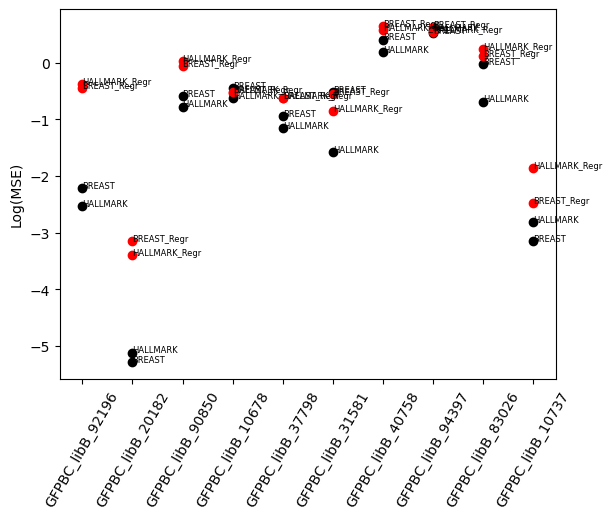

In [18]:
count = 1
for x in range(len(bardf.index)):
    for i in range(len(bardf.columns)):
        plt.scatter(count, np.log(bardf.iloc[x, i]), color=color[i])
        plt.annotate(bardf.columns[i].split()[0], (count, np.log(bardf.iloc[x, i])), fontsize=6)
    #plt.plot([count-0.3, count+0.3], [np.log(bardf.iloc[x, -1]), np.log(bardf.iloc[x, -1])], color='red')
    count += 1

plt.xticks(range(1, len(bardf.index)+1), bardf.index, rotation=60)
plt.ylabel('Log(MSE)')
plt.show()

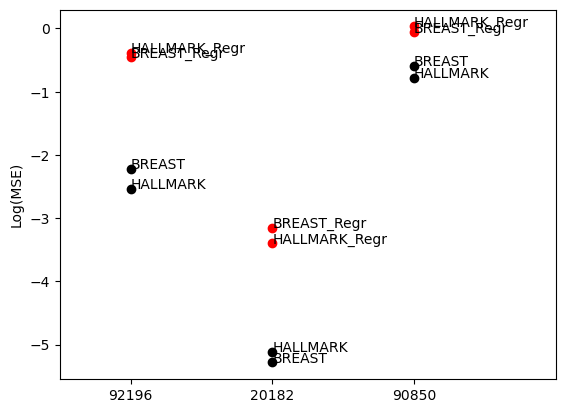

In [26]:
count = 1
include = ['GFPBC_libB_92196', 'GFPBC_libB_20182', 'GFPBC_libB_90850']
for x in range(len(bardf.index)):
    if bardf.index[x] in include:
        for i in range(len(bardf.columns)):
            plt.scatter(count, np.log(bardf.iloc[x, i]), color=color[i])
            plt.annotate(bardf.columns[i].split()[0], (count, np.log(bardf.iloc[x, i])), fontsize=10)
        #plt.plot([count-0.3, count+0.3], [np.log(bardf.iloc[x, -1]), np.log(bardf.iloc[x, -1])], color='red')
        count += 1

plt.xticks(range(1, count), [i.split('_')[-1] for i in bardf.index[:3]], rotation=0)
plt.xlim([0.5,4])
plt.ylabel('Log(MSE)')
plt.show()

In [73]:
round(bardf.mean(), 2)

T70           0.39
R70           0.59
T75           0.35
R75           0.59
T80           0.38
R80           0.54
T85           0.49
R85           0.64
T90           0.38
R90           0.52
T100          0.45
R100          0.58
T75iter_10    0.54
R75iter_10    0.47
T75_time      0.33
R75_time      0.47
T75_all       0.35
R75_all       0.49
dtype: float64

mse_dict_trans_9545_plsrres0.3_BREAST3.csv


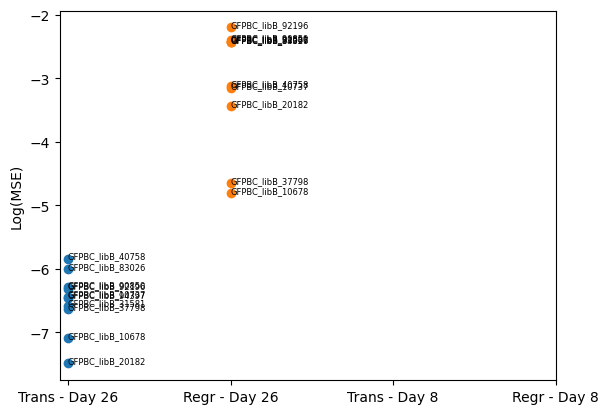

9545_plsrres0.3_BREAST3.csv Regr_9545_plsrres0.3_BREAST3.csv
mse_dict_trans_9545_plsrres0.3_HALL3.csv


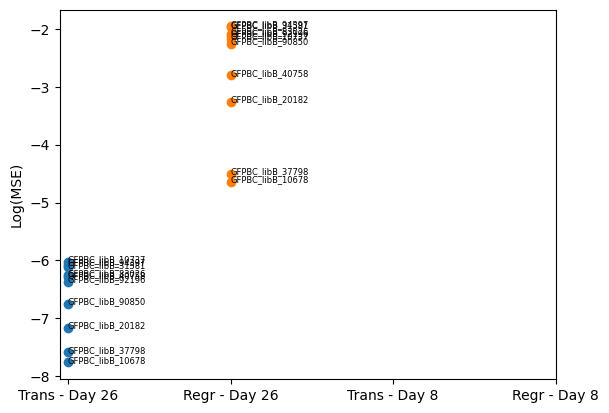

9545_plsrres0.3_HALL3.csv Regr_9545_plsrres0.3_HALL3.csv


In [30]:
# plotting training data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#mse_files = ['mse_dict_trans6_epoch5_seqlen8.csv', 'mse_dict_trans6_epoch5_seqlen10.csv', 'mse_dict_trans6_epoch5_seqlen15.csv']
mse_files = ['mse_dict_trans_9545_plsrres0.3_BREAST3.csv', 'mse_dict_trans_9545_plsrres0.3_HALL3.csv']
#mse_files = ['mse_dict_trans_palbo_plsrres0.3_BREAST3.csv', 'mse_dict_trans_palbo_plsrres0.3_HALL3.csv'] 
             #'mse_dict_trans_combo_plsrres0.5_BREAST.csv', 'mse_dict_trans_combo_plsrres0.5_HALL.csv']
bar_mse = {}
for x in mse_files:
    mse_file = open(x, 'r')
    for line in mse_file:
        mse = eval(line)
    trans_train = {}
    trans_val = {}
    regr_train = {}
    regr_val = {}
    for bar in mse.keys():
        trans_train[bar] = {}
        trans_val[bar] = {}
        regr_train[bar] = {}
        regr_val[bar] = {}
        for day in mse[bar].keys():
            trans_train[bar][day] = mse[bar][day][0]
            trans_val[bar][day] = mse[bar][day][1]
            regr_train[bar][day] = mse[bar][day][2]
            regr_val[bar][day] = mse[bar][day][3]
            
    trans_train_df = pd.DataFrame(trans_train)
    regr_train_df = pd.DataFrame(regr_train)
    
    print(x)
    tr_bar = []
    bars = []
    regr = []
    plt.scatter([1 for _ in trans_train_df.iloc[-1]], np.log(trans_train_df.iloc[-1]))
    for i in range(len(trans_train_df.iloc[-1])):
        plt.annotate(trans_train_df.columns[i], (1, np.log(trans_train_df.iloc[-1][i])), fontsize=6)
        tr_bar.append(trans_train_df.iloc[-1][i])
        bars.append(trans_train_df.columns[i])
        
    plt.scatter([2 for _ in trans_train_df.iloc[-1]], np.log(regr_train_df.iloc[-1]))
    for i in range(len(regr_train_df.iloc[-1])):
        plt.annotate(regr_train_df.columns[i], (2, np.log(regr_train_df.iloc[-1][i])), fontsize=6)
        regr.append(regr_train_df.iloc[-1][i])

    plt.xticks(range(1, 5), ['Trans - Day 26', 'Regr - Day 26', 'Trans - Day 8', 'Regr - Day 8'])
    plt.ylabel('Log(MSE)')
    plt.show()
    
    print(x.split('trans_')[-1], 'Regr_'+x.split('trans_')[-1])
    
    bar_mse[x.split('trans_')[-1]] = tr_bar
    
    bar_mse['Regr_'+x.split('trans_')[-1]] = regr

In [31]:
bardf = pd.DataFrame(bar_mse)
bardf.index = bars
bardf.columns = ['9545_BREAST', '9545_BREAST_R', '9545_HALL', '9545_HALL_R']
color = ['red' if '_R' in i else 'black' for i in bardf.columns]
bardf

,9545_BREAST,9545_BREAST_R,9545_HALL,9545_HALL_R
GFPBC_libB_92196,0.001815,0.110712,0.001702,0.119260
GFPBC_libB_20182,0.000559,0.032212,0.000769,0.038521
GFPBC_libB_90850,0.001862,0.090637,0.001162,0.105068
GFPBC_libB_10678,0.000835,0.008187,0.000425,0.009630
GFPBC_libB_37798,0.001310,0.009543,0.000506,0.010980
GFPBC_libB_31581,0.001385,0.088703,0.002195,0.139113
GFPBC_libB_40758,0.002909,0.043823,0.001846,0.060534
GFPBC_libB_94397,0.001570,0.087532,0.002294,0.141128
GFPBC_libB_83026,0.002464,0.087501,0.001910,0.124091
GFPBC_libB_10737,0.001596,0.042629,0.002399,0.114100


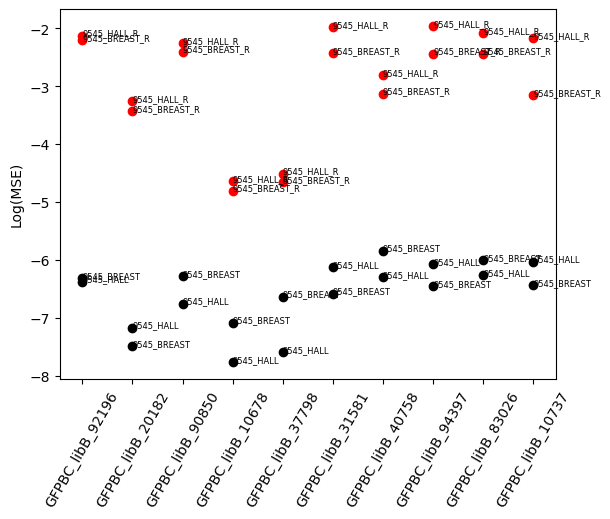

In [32]:
count = 1
for x in range(len(bardf.index)):
    for i in range(len(bardf.columns)):
        plt.scatter(count, np.log(bardf.iloc[x, i]), color=color[i])
        plt.annotate(bardf.columns[i].split()[0], (count, np.log(bardf.iloc[x, i])), fontsize=6)
    #plt.plot([count-0.3, count+0.3], [np.log(bardf.iloc[x, -1]), np.log(bardf.iloc[x, -1])], color='red')
    count += 1

plt.xticks(range(1, len(bardf.index)+1), bardf.index, rotation=60)
plt.ylabel('Log(MSE)')
plt.show()

In [33]:
def makeTrainMSE(mse_files, frac_str):
    bar_mse = {}
    for x in mse_files:
        mse_file = open(x, 'r')
        for line in mse_file:
            mse = eval(line)
        trans_train = {}
        trans_val = {}
        regr_train = {}
        regr_val = {}
        noattn_train = {}
        noattn_val = {}
        noenc_train = {}
        noenc_val = {}
        for bar in mse.keys():
            trans_train[bar] = {}
            trans_val[bar] = {}
            regr_train[bar] = {}
            regr_val[bar] = {}
            noattn_train[bar] = {}
            noattn_val[bar] = {}
            noenc_train[bar] = {}
            noenc_val[bar] = {}
            for day in mse[bar].keys():
                trans_train[bar][str(day)] = mse[bar][day][0]
                trans_val[bar][str(day)] = mse[bar][day][1]
                regr_train[bar][str(day)] = mse[bar][day][2]
                regr_val[bar][str(day)] = mse[bar][day][3]
                noattn_train[bar][str(day)] = mse[bar][day][4]
                noattn_val[bar][str(day)] = mse[bar][day][5]
                noenc_train[bar][str(day)] = mse[bar][day][6]
                noenc_val[bar][str(day)] = mse[bar][day][7]

        trans_train_df = pd.DataFrame(trans_train)
        noattn_train_df = pd.DataFrame(noattn_train)
        noenc_train_df = pd.DataFrame(noenc_train)
        regr_train_df = pd.DataFrame(regr_train)
        tr_bar = []
        bars = []
        regr = []
        noattn = []
        noenc = []
        
        for i in range(len(trans_train_df.loc[frac_str])):
            tr_bar.append(trans_train_df.loc[frac_str][i])
            bars.append(trans_train_df.columns[i])

        for i in range(len(regr_train_df.loc[frac_str])):
            regr.append(regr_train_df.loc[frac_str][i])

        for i in range(len(noattn_train_df.loc[frac_str])):
            noattn.append(noattn_train_df.loc[frac_str][i])

        for i in range(len(noenc_train_df.loc[frac_str])):
            noenc.append(noenc_train_df.loc[frac_str][i])

        bar_mse[x.split('trans_')[-1]] = tr_bar
        bar_mse['Regr_'+x.split('trans_')[-1]] = regr
        bar_mse['Noattn_'+x.split('trans_')[-1]] = noattn
        bar_mse['Noenc_'+x.split('trans_')[-1]] = noenc
        
    return bar_mse, bars

def makeValMSE(mse_files, frac_str):
    bar_mse = {}
    for x in mse_files:
        mse_file = open(x, 'r')
        for line in mse_file:
            mse = eval(line)
        trans_train = {}
        trans_val = {}
        regr_train = {}
        regr_val = {}
        noattn_train = {}
        noattn_val = {}
        noenc_train = {}
        noenc_val = {}
        for bar in mse.keys():
            trans_train[bar] = {}
            trans_val[bar] = {}
            regr_train[bar] = {}
            regr_val[bar] = {}
            noattn_train[bar] = {}
            noattn_val[bar] = {}
            noenc_train[bar] = {}
            noenc_val[bar] = {}
            for day in mse[bar].keys():
                trans_train[bar][str(day)] = mse[bar][day][0]
                trans_val[bar][str(day)] = mse[bar][day][1]
                regr_train[bar][str(day)] = mse[bar][day][2]
                regr_val[bar][str(day)] = mse[bar][day][3]
                noattn_train[bar][str(day)] = mse[bar][day][4]
                noattn_val[bar][str(day)] = mse[bar][day][5]
                noenc_train[bar][str(day)] = mse[bar][day][6]
                noenc_val[bar][str(day)] = mse[bar][day][7]

        trans_val_df = pd.DataFrame(trans_val)
        noattn_val_df = pd.DataFrame(noattn_val)
        noenc_val_df = pd.DataFrame(noenc_val)
        regr_val_df = pd.DataFrame(regr_val)
        tr_bar = []
        bars = []
        regr = []
        noattn = []
        noenc = []
        
        for i in range(len(trans_val_df.loc[frac_str])):
            tr_bar.append(trans_val_df.loc[frac_str][i])
            bars.append(trans_train_df.columns[i])

        for i in range(len(regr_val_df.loc[frac_str])):
            regr.append(regr_val_df.loc[frac_str][i])

        for i in range(len(noattn_val_df.loc[frac_str])):
            noattn.append(noattn_val_df.loc[frac_str][i])

        for i in range(len(noenc_val_df.loc[frac_str])):
            noenc.append(noenc_val_df.loc[frac_str][i])

        bar_mse[x.split('trans_')[-1]] = tr_bar
        bar_mse['Regr_'+x.split('trans_')[-1]] = regr
        bar_mse['Noattn_'+x.split('trans_')[-1]] = noattn
        bar_mse['Noenc_'+x.split('trans_')[-1]] = noenc
        
    return bar_mse, bars


def makeBardf(bar_mse, colnames, bars):
    bardf = pd.DataFrame(bar_mse)
    bardf.index = bars
    bardf.columns = colnames
    #color = ['red' if '_R' in i else 'black' for i in bardf.columns]
    color = []
    for i in bardf.columns:
        if '_R' in i:
            color.append('red')
        if '_noatt' in i:
            color.append('green')
        if 'noenc' in i:
            color.append('blue')
        if '_t' in i:
            color.append('black')
    return bardf, color

def plotMSE(bardf, color, title):
    count = 1
    for x in range(len(bardf.index)):
        for i in range(len(bardf.columns)):
            plt.scatter(count, np.log(bardf.iloc[x, i]), color=color[i])
            plt.annotate(bardf.columns[i].split()[0], (count, np.log(bardf.iloc[x, i])), fontsize=6)
        #plt.plot([count-0.3, count+0.3], [np.log(bardf.iloc[x, -1]), np.log(bardf.iloc[x, -1])], color='red')
        count += 1

    plt.xticks(range(1, len(bardf.index)+1), bardf.index, rotation=60)
    plt.ylabel('Log(MSE)')
    plt.title(title)
    plt.show()

In [34]:
def plotNormMSE(bardf, color, title, rcol):
    
    rlist = bardf[rcol].tolist()
    for row in range(len(bardf.index)):
        for col in range(len(bardf.columns)):
            bardf.iloc[row, col] = bardf.iloc[row, col] - rlist[row]
            
    bardf = bardf.drop(columns=[rcol])
    #print(bardf)
    count = 1
    for x in range(len(bardf.index)):
        for i in range(len(bardf.columns)):
            plt.scatter(count, bardf.iloc[x, i], color=color[i])
            #plt.annotate(bardf.columns[i].split()[0], (count, bardf.iloc[x, i]), fontsize=6)
        count += 1
        
    plt.xticks(range(1, len(bardf.index)+1), bardf.index, rotation=60)
    plt.plot([0, len(bardf.index)+1], [0,0], linestyle='dashed', color='black')
    plt.ylabel('Normalized MSE')
    plt.title(title)
    plt.show()
    
    #print(bardf)
    return bardf


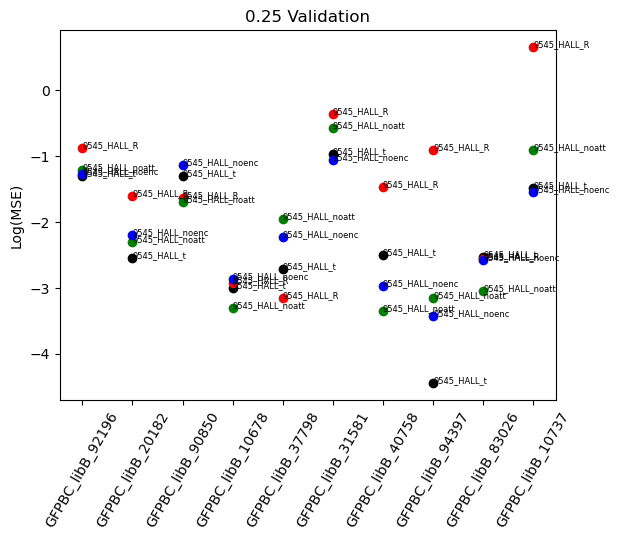

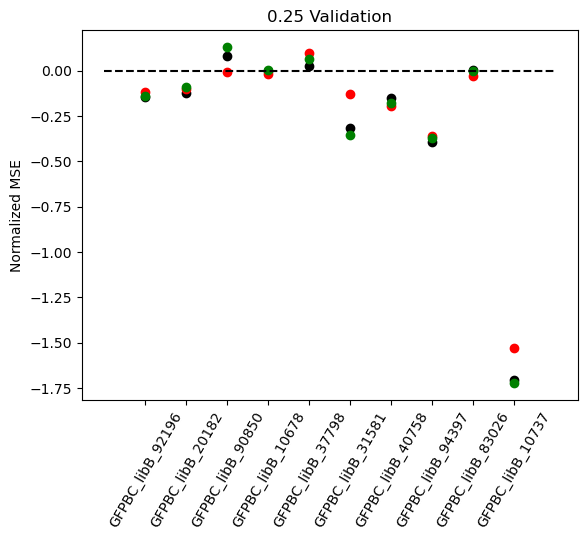

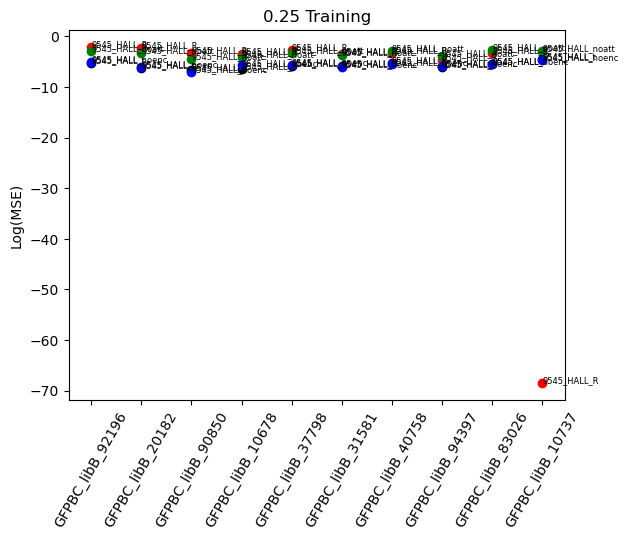

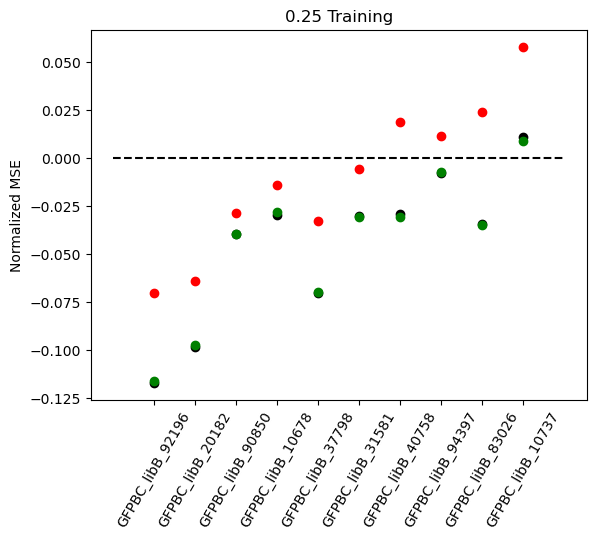

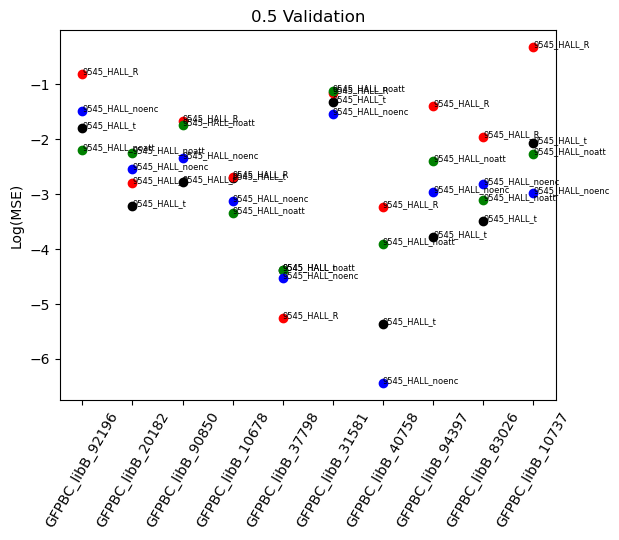

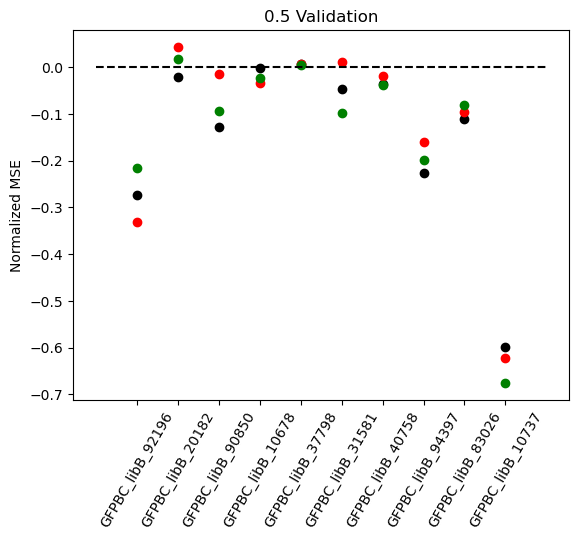

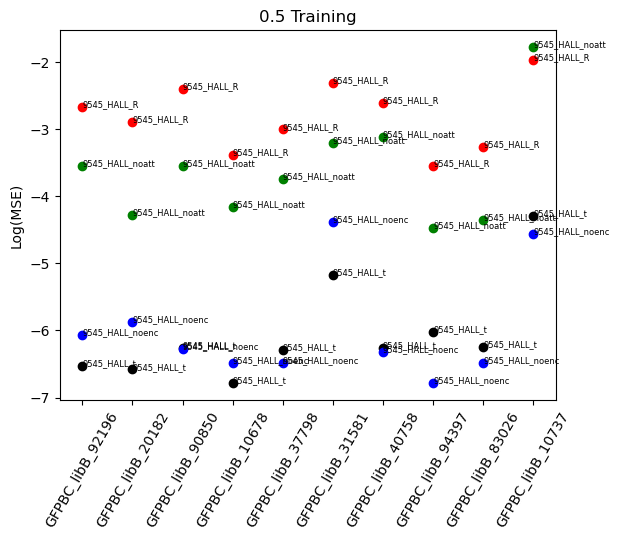

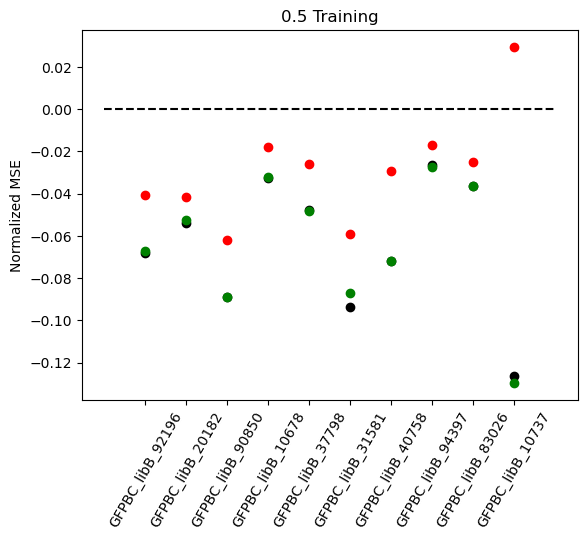

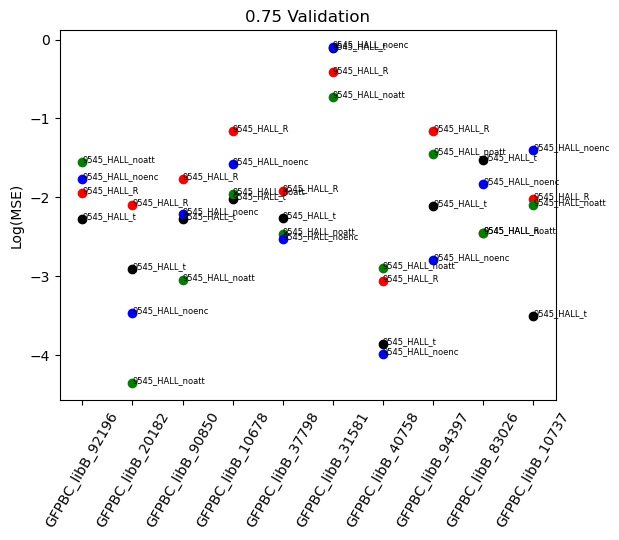

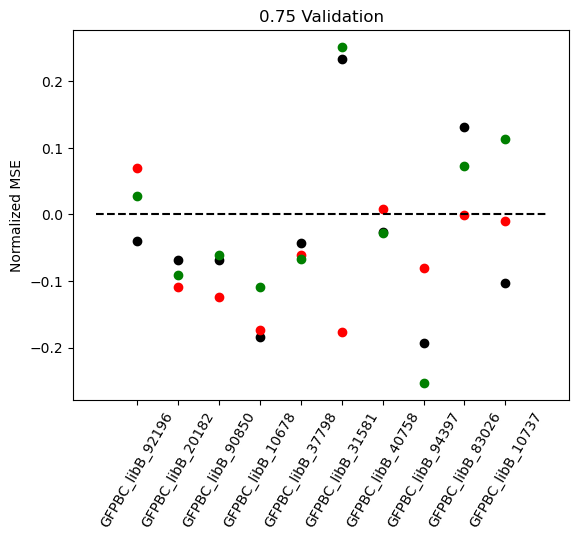

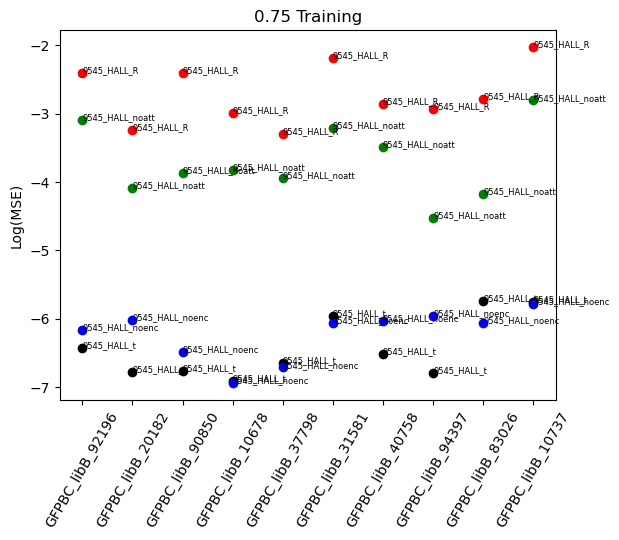

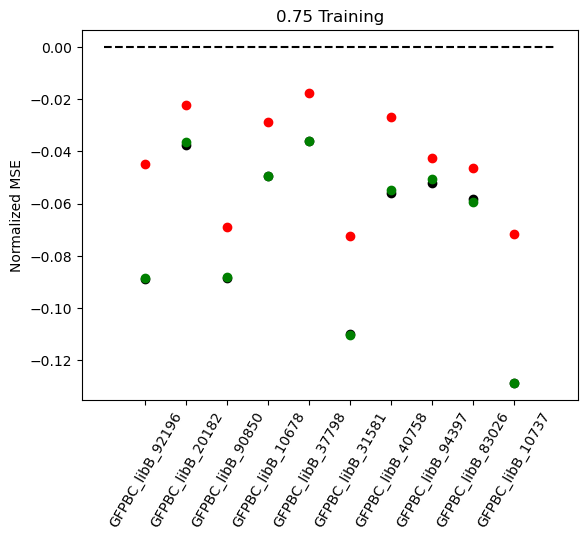

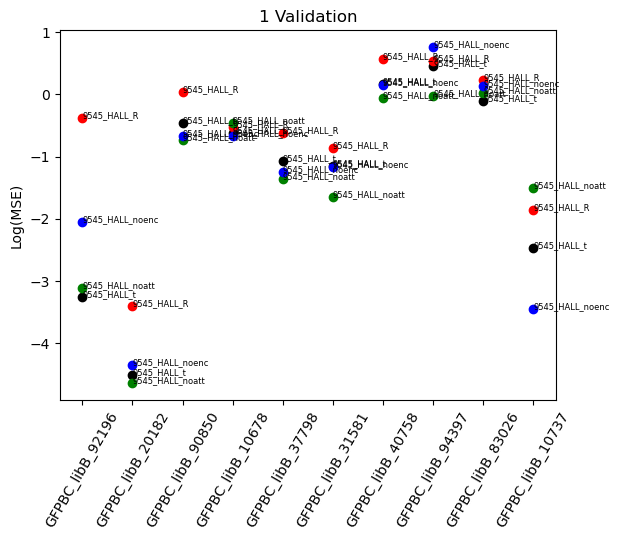

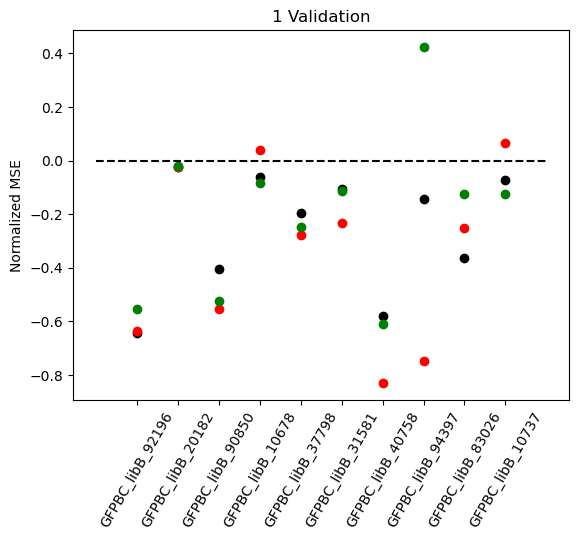

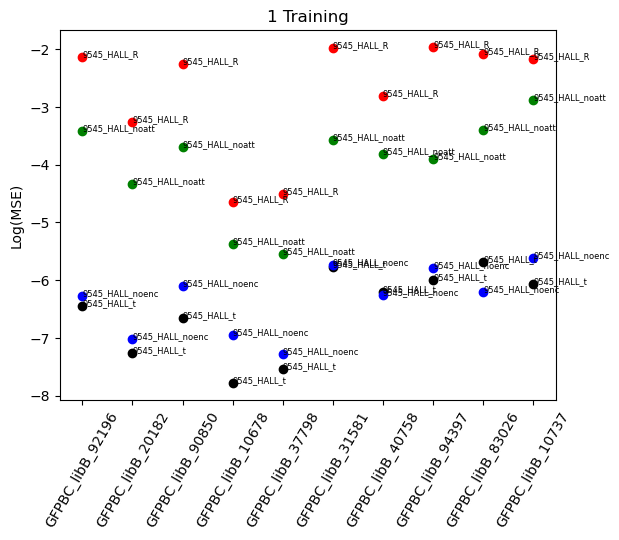

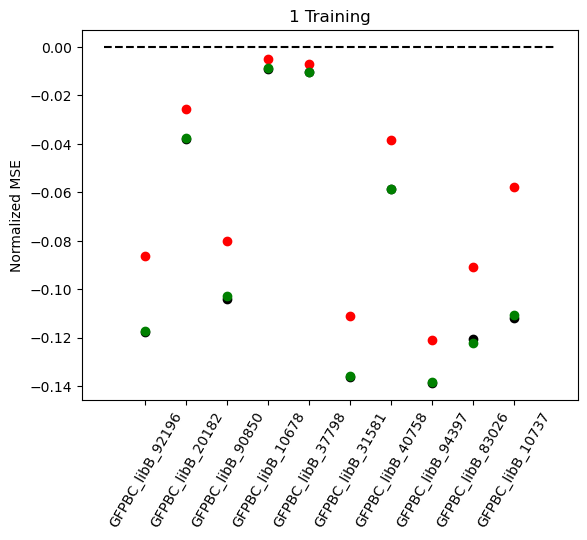

In [35]:
#mse_files = ['mse_dict_trans_9545_plsrres0.3_BREAST5.csv', 'mse_dict_trans_9545_plsrres0.3_HALL5.csv']
mse_files = ['mse_dict_trans_9545_plsrres0.3_HALL5.csv']
frac_str = '1'
cols = ['9545_HALL_t', '9545_HALL_R', '9545_HALL_noatt', '9545_HALL_noenc']

valdf = pd.DataFrame()
traindf = pd.DataFrame()
val_dict = {}
train_dict = {}
for frac_str in ['0.25', '0.5', '0.75', '1']:
    bar_mse, bars = makeValMSE(mse_files, frac_str)
    bardf, color = makeBardf(bar_mse, cols, bars)
    plotMSE(bardf, color, frac_str+' Validation')
    sumdf = plotNormMSE(bardf, color, frac_str+' Validation', '9545_HALL_R')
    #print(sumdf)
    #print(sumdf.sum().tolist())
    val_dict[frac_str] = sumdf.sum().tolist()
    valdf = valdf.add(sumdf, fill_value=0)

    bar_mse, bars = makeTrainMSE(mse_files, frac_str)
    bardf, color = makeBardf(bar_mse, cols, bars)
    plotMSE(bardf, color, frac_str+' Training')
    sum2df = plotNormMSE(bardf, color, frac_str+' Training', '9545_HALL_R')
    #print(sum2df)
    train_dict[frac_str] = sum2df.sum().tolist()
    traindf = traindf.add(sum2df, fill_value=0)
    
#traindf

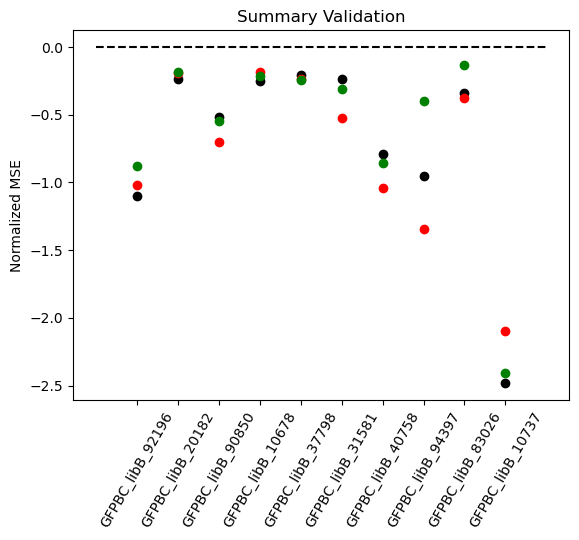

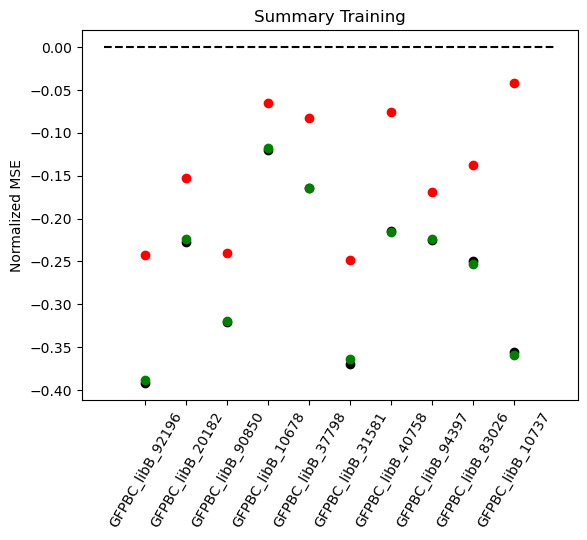

,9545_HALL_t,9545_HALL_noatt,9545_HALL_noenc
GFPBC_libB_92196,-0.391680,-0.242221,-0.388789
GFPBC_libB_20182,-0.227628,-0.152838,-0.223983
GFPBC_libB_90850,-0.320380,-0.239889,-0.319469
GFPBC_libB_10678,-0.120490,-0.065440,-0.118131
GFPBC_libB_37798,-0.164223,-0.083157,-0.163986
GFPBC_libB_31581,-0.370125,-0.247782,-0.363724
GFPBC_libB_40758,-0.214772,-0.076045,-0.215624
GFPBC_libB_94397,-0.224465,-0.168519,-0.223284
GFPBC_libB_83026,-0.249438,-0.137990,-0.252675
GFPBC_libB_10737,-0.355871,-0.041831,-0.359511


In [36]:
count = 1
for x in range(len(valdf.index)):
    for i in range(len(valdf.columns)):
        plt.scatter(count, valdf.iloc[x, i], color=color[i])
        #plt.annotate(bardf.columns[i].split()[0], (count, bardf.iloc[x, i]), fontsize=6)
    count += 1

plt.xticks(range(1, len(valdf.index)+1), valdf.index, rotation=60)
plt.plot([0, len(valdf.index)+1], [0,0], linestyle='dashed', color='black')
plt.ylabel('Normalized MSE')
plt.title('Summary Validation')
plt.show()


count = 1
for x in range(len(traindf.index)):
    for i in range(len(traindf.columns)):
        plt.scatter(count, traindf.iloc[x, i], color=color[i])
        #plt.annotate(bardf.columns[i].split()[0], (count, bardf.iloc[x, i]), fontsize=6)
    count += 1

plt.xticks(range(1, len(traindf.index)+1), traindf.index, rotation=60)
plt.plot([0, len(traindf.index)+1], [0,0], linestyle='dashed', color='black')
plt.ylabel('Normalized MSE')
plt.title('Summary Training')
plt.show()

valdf
traindf

                  0.25       0.5      0.75         1
Transformer  -2.731443 -1.435577 -0.358709 -2.586887
No Attention -2.392466 -1.212435 -0.657159 -3.446501
No Encoder   -2.659236 -1.400381 -0.142081 -1.975797

                  0.25       0.5      0.75         1
Transformer  -0.444418 -0.644988 -0.705159 -0.844505
No Attention -0.102185 -0.289477 -0.441371 -0.622680
No Encoder   -0.444462 -0.640902 -0.701979 -0.841833


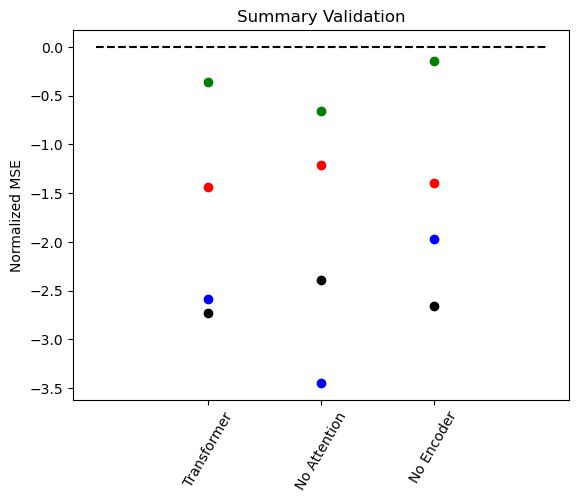

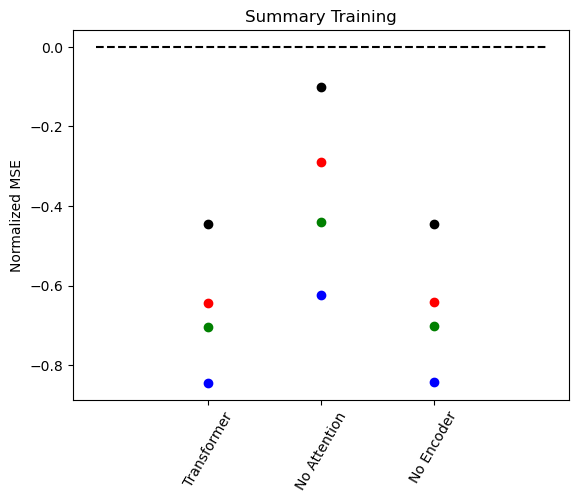

In [37]:
valdf2 = pd.DataFrame(val_dict)
traindf2 = pd.DataFrame(train_dict)

rows = ['Transformer', 'No Attention', 'No Encoder']
valdf2.index = rows
traindf2.index = rows

print(valdf2)
print()
print(traindf2)

count = 1
for x in range(len(valdf2.index)):
    for i in range(len(valdf2.columns)):
        plt.scatter(count, valdf2.iloc[x, i], color=color[i])
        #plt.annotate(bardf.columns[i].split()[0], (count, bardf.iloc[x, i]), fontsize=6)
    count += 1

plt.xticks(range(1, len(valdf2.index)+1), valdf2.index, rotation=60)
plt.plot([0, len(valdf2.index)+1], [0,0], linestyle='dashed', color='black')
plt.ylabel('Normalized MSE')
plt.title('Summary Validation')
plt.show()


count = 1
for x in range(len(traindf2.index)):
    for i in range(len(traindf2.columns)):
        plt.scatter(count, traindf2.iloc[x, i], color=color[i])
        #plt.annotate(bardf.columns[i].split()[0], (count, bardf.iloc[x, i]), fontsize=6)
    count += 1

plt.xticks(range(1, len(traindf2.index)+1), traindf2.index, rotation=60)
plt.plot([0, len(traindf2.index)+1], [0,0], linestyle='dashed', color='black')
plt.ylabel('Normalized MSE')
plt.title('Summary Training')
plt.show()